In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('TestDataSet.csv', sep=';')
df

,id,Nose_x0,Nose_y0,Neck_x1,Neck_y1,RShoulder_x2,RShoulder_y2,Relbow_x3,RElbow_y3,RWrist_x4,...,REye_x14,REye_y14,LEye_x15,LEye_y15,REar_x16,REar_y16,LEar_x17,LEar_y17,action,video_src
0,1267,162,60,166,67,163,66,162,74,158,...,161,59,163,59,0,0,165,60,walk,C:/Users/User/tf-pose-estimationActionRecognit...
1,1268,159,61,163,67,162,67,160,74,156,...,159,59,160,59,0,0,163,60,walk,C:/Users/User/tf-pose-estimationActionRecognit...
2,1269,158,61,163,67,160,67,159,75,153,...,158,59,158,59,0,0,161,60,walk,C:/Users/User/tf-pose-estimationActionRecognit...
3,1270,156,61,160,67,159,67,157,75,153,...,156,59,157,59,0,0,159,60,walk,C:/Users/User/tf-pose-estimationActionRecognit...
4,1271,154,60,158,67,157,67,155,75,150,...,154,59,155,59,0,0,158,60,walk,C:/Users/User/tf-pose-estimationActionRecognit...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,2436,31,48,38,52,38,52,0,0,0,...,0,0,32,46,0,0,34,46,jump forward,C:/Users/User/tf-pose-estimationActionRecognit...
1170,2437,27,49,33,54,36,54,0,0,0,...,0,0,28,48,0,0,30,48,jump forward,C:/Users/User/tf-pose-estimationActionRecognit...
1171,2438,23,52,30,56,32,56,0,0,0,...,0,0,24,50,0,0,27,50,jump forward,C:/Users/User/tf-pose-estimationActionRecognit...
1172,2439,20,52,27,58,27,57,23,69,0,...,0,0,21,51,0,0,24,52,jump forward,C:/Users/User/tf-pose-estimationActionRecognit...


In [3]:
df.notna().sum(axis=1)

0       39
1       39
2       39
3       39
4       39
        ..
1169    39
1170    39
1171    39
1172    39
1173    39
Length: 1174, dtype: int64

In [4]:
df.index = df.id
df = df.drop(['id', 'action', 'video_src'], axis = 1)
df

,Nose_x0,Nose_y0,Neck_x1,Neck_y1,RShoulder_x2,RShoulder_y2,Relbow_x3,RElbow_y3,RWrist_x4,RWrist_y4,...,LAnkle_x13,LAnkle_y13,REye_x14,REye_y14,LEye_x15,LEye_y15,REar_x16,REar_y16,LEar_x17,LEar_y17
id,,,,,,,,,,,,,,,,,,,,,
1267,162,60,166,67,163,66,162,74,158,78,...,169,111,161,59,163,59,0,0,165,60
1268,159,61,163,67,162,67,160,74,156,78,...,170,111,159,59,160,59,0,0,163,60
1269,158,61,163,67,160,67,159,75,153,79,...,171,111,158,59,158,59,0,0,161,60
1270,156,61,160,67,159,67,157,75,153,79,...,170,111,156,59,157,59,0,0,159,60
1271,154,60,158,67,157,67,155,75,150,79,...,169,111,154,59,155,59,0,0,158,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,31,48,38,52,38,52,0,0,0,0,...,43,106,0,0,32,46,0,0,34,46
2437,27,49,33,54,36,54,0,0,0,0,...,38,108,0,0,28,48,0,0,30,48
2438,23,52,30,56,32,56,0,0,0,0,...,34,109,0,0,24,50,0,0,27,50


In [5]:
A = df.fillna(0).as_matrix()
A

C:\Users\Zhastay\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[162,  60, 166, ...,   0, 165,  60],
       [159,  61, 163, ...,   0, 163,  60],
       [158,  61, 163, ...,   0, 161,  60],
       ...,
       [ 23,  52,  30, ...,   0,  27,  50],
       [ 20,  52,  27, ...,   0,  24,  52],
       [ 18,  54,  24, ...,   0,  22,  53]], dtype=int64)

In [6]:
def difference(arr):
    result = []
    for i in range(len(arr)-1):
        result.append(abs(A[i] - A[i+1]))
    return np.array(result)

In [7]:
df.to_csv('main_1.csv', index=False)

In [8]:
pd.DataFrame(difference(A), columns = df.columns).to_csv('difference_1.csv', index=False)

# SVD k decreasing

In [9]:
user_ratings_mean = np.mean(A, axis = 1)
A_demeaned = A - user_ratings_mean.reshape(-1, 1)

In [14]:
k = 1
n = 0

In [15]:
from scipy.sparse.linalg import svds
u, s, v = svds(A_demeaned, k=k)
print(u.shape, s.shape, v.shape)

(1174, 1) (1,) (1, 36)


In [16]:
s

array([5096.38113318])

In [17]:
_A = np.dot(np.dot(u[:,:], np.diag(s[:])), v[:,:]) + user_ratings_mean.reshape(-1, 1)[:]
_A.shape

(1174, 36)

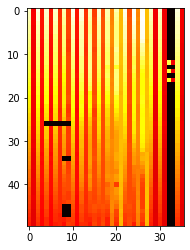

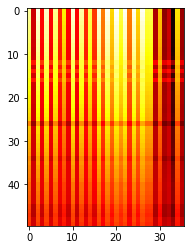

In [18]:
plt.imshow(A[:50], cmap='hot', interpolation='nearest')
plt.show()
plt.imshow(_A[:50], cmap='hot', interpolation='nearest')
plt.show()

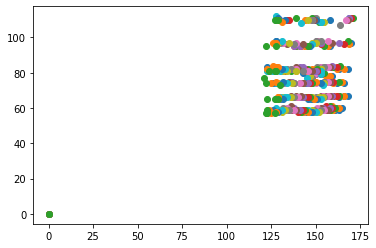

In [19]:
for j in range(A.shape[0]//50):
    axray = pd.DataFrame(np.array([[A[j][i], A[j][i+1]] for i in range(0, A.shape[1], 2)]), columns=['x', 'y'])
    #_axray = pd.DataFrame(np.array([[_A[j][i], _A[j][i+1]] for i in range(0, A.shape[1], 2)]), columns=['x', 'y'])
    plt.plot(axray['x'], axray['y'], 'o')
    #plt.plot(_axray['x'], _axray['y'], 'o')
plt.show()

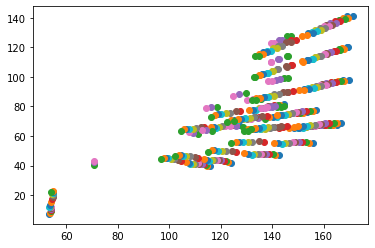

In [20]:
for j in range(_A.shape[0]//50):
    #axray = pd.DataFrame(np.array([[A[j][i], A[j][i+1]] for i in range(0, A.shape[1], 2)]), columns=['x', 'y'])
    _axray = pd.DataFrame(np.array([[_A[j][i], _A[j][i+1]] for i in range(0, _A.shape[1], 2)]), columns=['x', 'y'])
    #plt.plot(axray['x'], axray['y'], 'o')
    plt.plot(_axray['x'], _axray['y'], 'o')
plt.show()

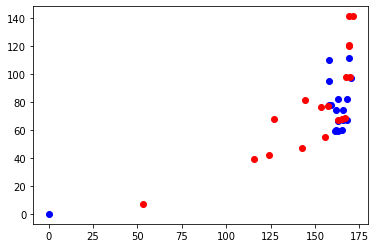

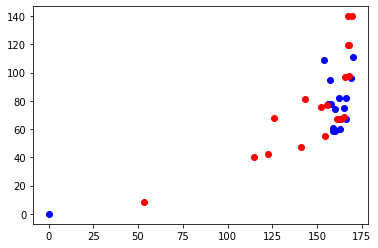

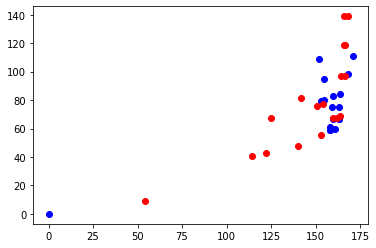

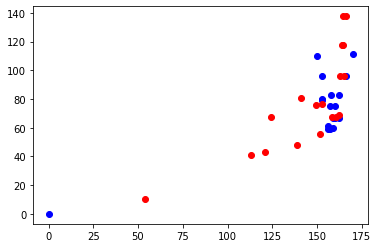

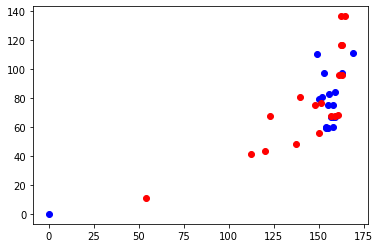

In [21]:
for j in range(5):
    axray = pd.DataFrame(np.array([[A[j][i], A[j][i+1]] for i in range(0, A.shape[1], 2)]), columns=['x', 'y'])
    _axray = pd.DataFrame(np.array([[_A[j][i], _A[j][i+1]] for i in range(0, A.shape[1], 2)]), columns=['x', 'y'])
    plt.plot(axray['x'], axray['y'], 'bo')
    plt.plot(_axray['x'], _axray['y'], 'ro')
    plt.show()

In [52]:
correl = np.mean([pearsonr(A[i], _A[i])[0] for i in range(_A.shape[0])])
print('Pearsons correlation: %.3f' % correl)

Pearsons correlation: 0.986
